In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [7]:
# One-hot encoding for furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [7]:
# Defining features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

In [8]:
# Checking for missing values and handling them (if any)
df = df.dropna()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred = model.predict(X_test)

In [22]:
#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [23]:
# Printing model performance metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Root Mean Squared Error (RMSE): 1324506.96
R-squared Score: 0.65


In [24]:
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Model Coefficients:
area: 235.97
bedrooms: 76778.70
bathrooms: 1094444.79
stories: 407476.59
mainroad: 367919.95
guestroom: 231610.04
basement: 390251.18
hotwaterheating: 684649.89
airconditioning: 791426.74
parking: 224841.91
prefarea: 629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06
Intercept: 260032.36


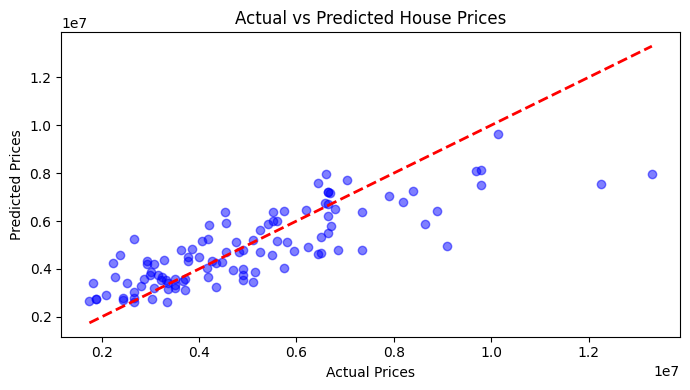

In [25]:
# Visualization 1: Scatter plot of actual vs predicted prices
plt.figure(figsize=(7, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

In [26]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'RMSE': rmse,
        'R2': r2,
        'predictions': y_pred
    }
    
    print(f"\n{name} Results:")
    print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
    print(f"R-squared Score: {r2:.4f}")


Linear Regression Results:
Root Mean Squared Error (RMSE): 1,324,506.96
R-squared Score: 0.6529

Random Forest Results:
Root Mean Squared Error (RMSE): 1,401,496.84
R-squared Score: 0.6114

XGBoost Results:
Root Mean Squared Error (RMSE): 1,448,930.01
R-squared Score: 0.5847

Gradient Boosting Results:
Root Mean Squared Error (RMSE): 1,299,761.15
R-squared Score: 0.6658

XGBoost Results:
Root Mean Squared Error (RMSE): 1,448,930.01
R-squared Score: 0.5847

Gradient Boosting Results:
Root Mean Squared Error (RMSE): 1,299,761.15
R-squared Score: 0.6658


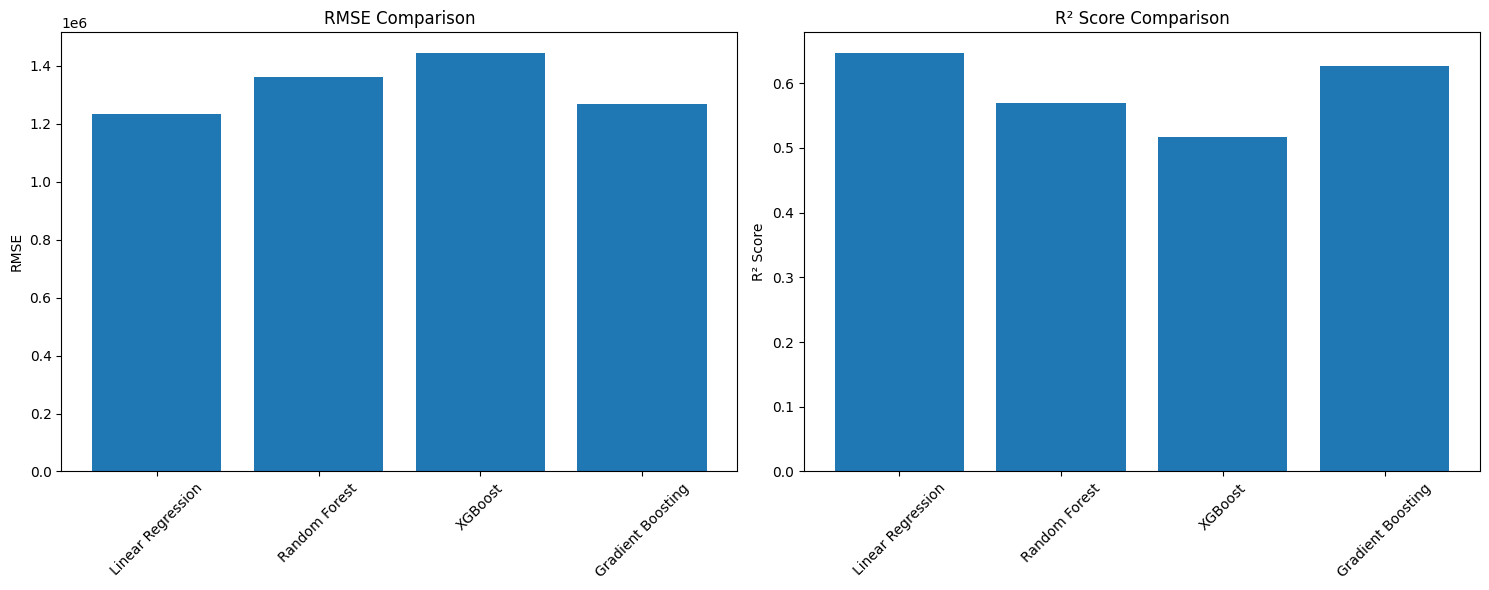

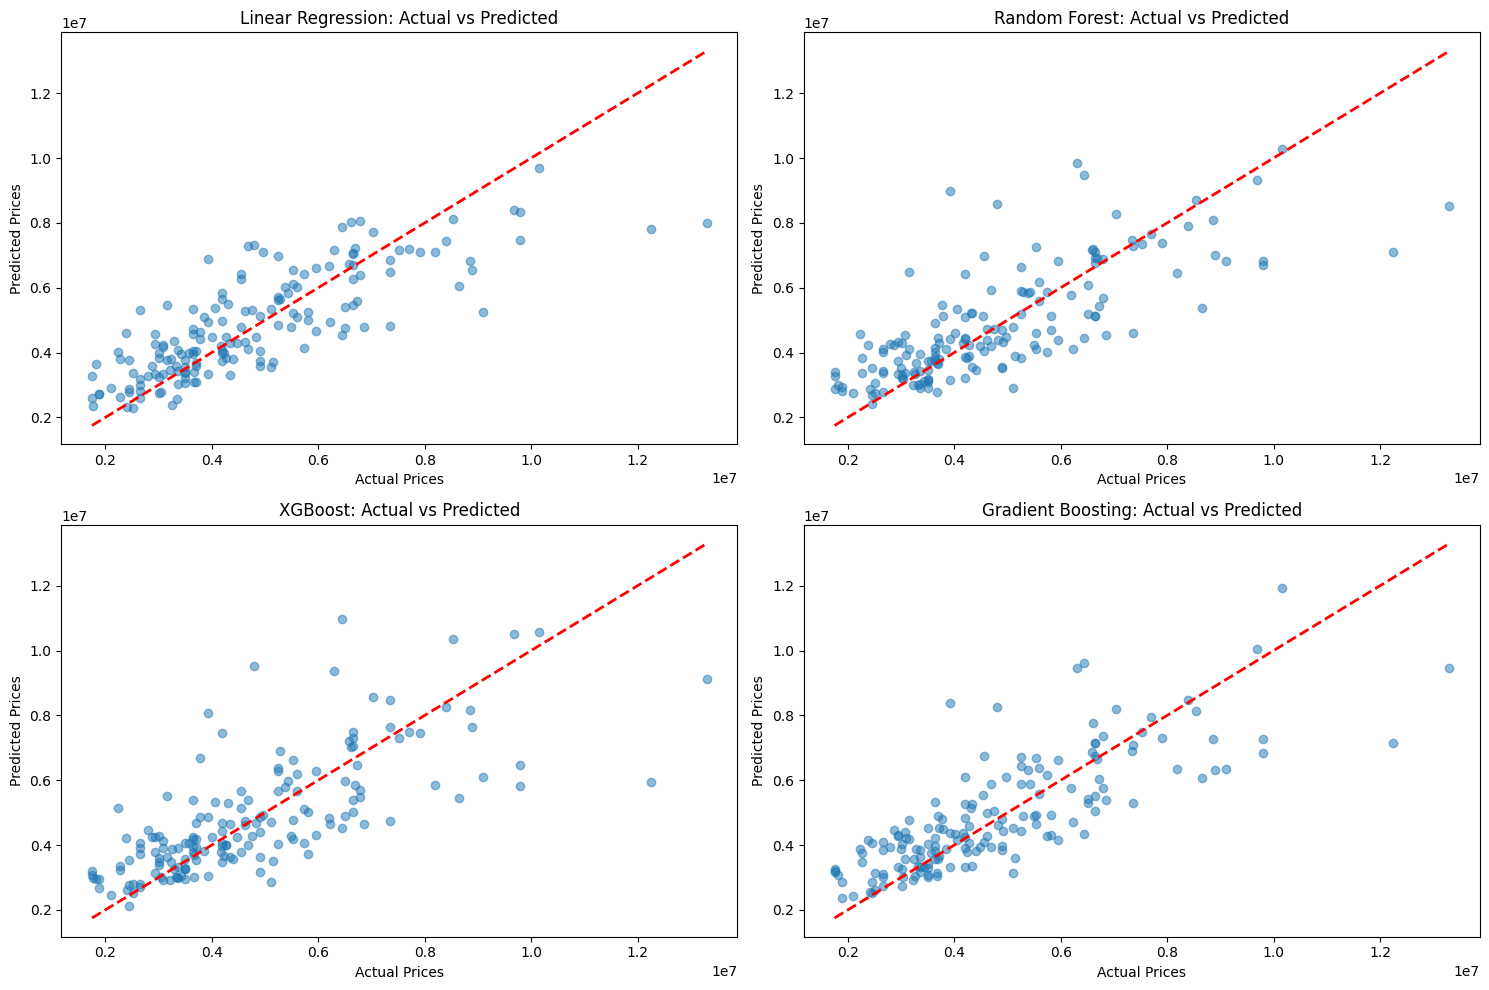

In [17]:
# Create comparison visualizations
plt.figure(figsize=(15, 6))

# Plot 1: RMSE Comparison
plt.subplot(1, 2, 1)
rmse_values = [results[model]['RMSE'] for model in results]
plt.bar(results.keys(), rmse_values)
plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

# Plot 2: R² Comparison
plt.subplot(1, 2, 2)
r2_values = [results[model]['R2'] for model in results]
plt.bar(results.keys(), r2_values)
plt.title('R² Score Comparison')
plt.xticks(rotation=45)
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

# Create scatter plots for each model
plt.figure(figsize=(15, 10))
for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test, result['predictions'], alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{name}: Actual vs Predicted')
plt.tight_layout()
plt.show()

In [2]:
import requests

data = {
    "area": 9000,
    "bedrooms": 4,
    "bathrooms": 2,
    "stories": 3,
    "mainroad": "yes",
    "guestroom": "no",
    "basement": "no",
    "hotwaterheating": "yes",
    "airconditioning": "no",
    "parking": 2,
    "prefarea": "yes",
    "furnishingstatus": "semi-furnished"
}

response = requests.post("http://127.0.0.1:8000/predict", json=data)
print(response.json())

{'predicted_price': 8107448}
